# REGRESSION

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)

1.9.0


In [3]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

#### Shuffle the data (Because this is with regression dataset)

In [4]:
order = np.argsort(np.random.random(train_labels.shape))
print ('order: {}'.format(order))
train_data = train_data[order]
train_labels = train_labels[order]

order: [133 229  58 164 317 331 154 303 209 217 239  45 318  48  86 207 387   2
  76  75  73  14 131 151 263   7 340  18  25 297  63 197 287 378 310 172
  10 204 146 350  62 368 137 357 236 119 162 271  35 382 315 371 105   5
  47 341 291 305 240  38 261 189 286 205 193 328 361  80 339 316 301 401
 347 295 157 349 192 177  53  50  92 166 247 210 246 358 325 330 276  89
 356 304 235 168 326 338 293 152 190 270 343  57 224 108 254 225  26 403
 216  98 324 198 388  78 262 148 103 394  30 351 400 226 202 256  70 110
  44 259  36 143 250  66 196 386 313 373 112  95 314 296 182 129   9  77
 248  54 365  20 392 274  15  11 384 153 355 156 237 101 155 266 227 188
 272 173 329 277 169  97 397 265 130 223 211  16  39 158  79 284 311 345
 283  55 214 353 208 292 306  83 149 106  88 363  24 114 141 187 385 319
 367 231 260  74 288 159 346   0  32 269  99 334 257 366 194 174 380 201
 396 221  42 230 136 233 344  17 389 134 186  81 215  82 144 139 395 203
 342   6 242 333 109 124 354 377  61 126   1

In [5]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


#### Look at first entry

In [6]:
print(train_data[0])

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [7]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [8]:
print(train_labels[0:10])  # Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


### Scale by normalizing the data

In [11]:
mean = train_data.mean(axis=0)
print (mean.shape)
std = train_data.std(axis=0)
print (mean)
print (std.shape)
print(std)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

(13,)
[-1.02640668e-16 -6.98011506e-17  1.25971840e-15 -6.12821125e-17
 -4.24852672e-16 -1.10816197e-15  1.25174898e-15  4.97951515e-16
 -2.19846143e-17 -2.04456913e-16  2.36878723e-14  3.04871639e-15
 -8.46132845e-16]
(13,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Create the model

In [9]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                          input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [10]:
f = open('test', 'w')

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
        print('.', end='')
        
EPOCHS=500

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                   validation_split=0.2, verbose=0,
                   callbacks=[PrintDot()])

f.close()


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [11]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

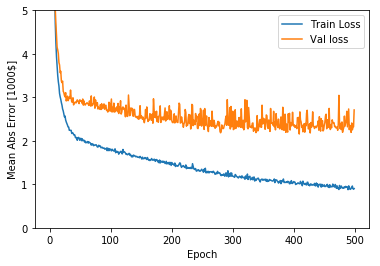

In [12]:
plot_history(history)


....................................................................................................
..

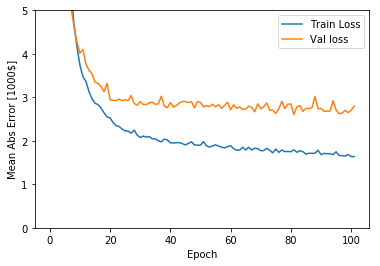

In [13]:
model2 = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history2 = model2.fit(train_data, train_labels, epochs=EPOCHS,
                     validation_split=0.2, verbose=0,
                     callbacks=[early_stop, PrintDot()])

plot_history(history2)

In [14]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae*1000))

Testing set Mean Abs Error: $2758.32


In [15]:
test_predictions = model.predict(test_data).flatten()

print (test_predictions)

[ 7.1694636 18.758121  21.143597  35.56041   26.308231  23.822819
 28.95015   22.559547  18.054817  18.061567  21.450113  17.553646
 14.950425  43.128284  17.303905  21.625881  26.178104  17.891504
 16.88149   20.197659   9.802418  12.191537  21.738556  16.843262
 23.764858  24.17927   28.851963  34.905785   8.991606  21.234901
 20.024279  13.961944  35.367096  24.665974  17.504587   4.221587
 16.969528  17.702469  19.06222   28.338657  35.423004  27.948107
 11.785722  45.315224  31.027224  30.132256  29.864433  20.239067
 18.598087  23.048775  36.097206  22.661152   6.1276793 13.333389
 36.598682  30.022419   9.385488  50.055103  38.174263  27.39988
 22.819641  11.427972  12.265204  20.88715   24.572685  23.502632
 13.488809  23.709475   9.197803   7.22793   19.434933  31.493267
 23.66517    9.2190075 26.188717  21.728289  20.223879  24.095562
 34.96019    7.231189  23.439869  38.36709   18.195023  11.941116
 18.072262  22.474012  18.480856  21.363323  20.599197  32.301125
 25.107342 